In [16]:
from mmdet.apis import init_detector, inference_detector
from mmdet.registry import VISUALIZERS
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# download model

In [17]:
!mim download mmdet --config rtmdet-ins_tiny_8xb32-300e_coco --dest ./checkpoints

processing rtmdet-ins_tiny_8xb32-300e_coco...
rtmdet-ins_tiny_8xb32-300e_coco_20221130_151727-ec670f7e.pth exists in d:\ml\code\mm\mmdetection\checkpoints
Successfully dumped rtmdet-ins_tiny_8xb32-300e_coco.py to d:\ml\code\mm\mmdetection\checkpoints


In [18]:
config_file = 'configs/rtmdet/rtmdet-ins_tiny_8xb32-300e_coco.py'
checkpoint_file = 'checkpoints/rtmdet-ins_tiny_8xb32-300e_coco_20221130_151727-ec670f7e.pth'
image_file = 'demo/demo.jpg'

(640, 427)


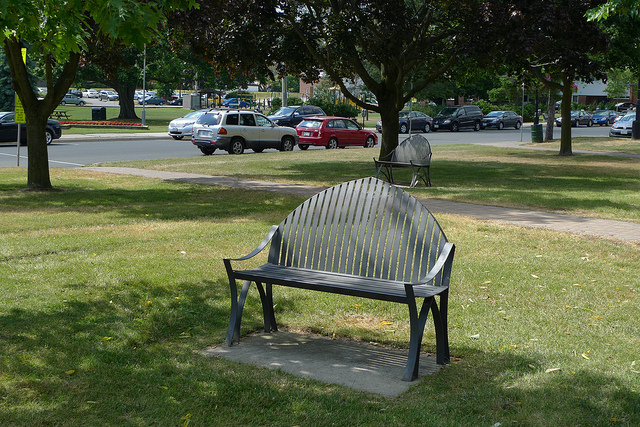

In [19]:
image = Image.open(image_file)
print(image.size) # w h
image

# model&infer

In [20]:
model = init_detector(config_file, checkpoint_file, device='cuda:0')
model

Loads checkpoint by local backend from path: checkpoints/rtmdet-ins_tiny_8xb32-300e_coco_20221130_151727-ec670f7e.pth


RTMDet(
  (data_preprocessor): DetDataPreprocessor()
  (backbone): CSPNeXt(
    (stem): Sequential(
      (0): ConvModule(
        (conv): Conv2d(3, 12, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): _BatchNormXd(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activate): SiLU(inplace=True)
      )
      (1): ConvModule(
        (conv): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): _BatchNormXd(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activate): SiLU(inplace=True)
      )
      (2): ConvModule(
        (conv): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): _BatchNormXd(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activate): SiLU(inplace=True)
      )
    )
    (stage1): Sequential(
      (0): ConvModule(
        (conv): Conv2d(24, 48, kernel_size=(3, 3), stride=(2, 2), pad

In [21]:
result = inference_detector(model, image_file)
result

<DetDataSample(

    META INFORMATION
    pad_shape: (640, 640)
    img_path: 'demo/demo.jpg'
    img_shape: (640, 640)
    img_id: 0
    scale_factor: (1.0, 1.0)
    batch_input_shape: (640, 640)
    ori_shape: (427, 640)

    DATA FIELDS
    ignored_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([], device='cuda:0', size=(0, 4))
            labels: tensor([], device='cuda:0', dtype=torch.int64)
        ) at 0x19a6f5351d0>
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            masks: tensor([[[False, False, False,  ..., False, False, False],
                         [False, False, False,  ..., False, False, False],
                         [False, False, False,  ..., False, False, False],
                         ...,
                         [False, False, False,  ..., False, False, False],
                         [False, False, False,  ..., Fal

In [22]:
scores = result.pred_instances.scores.cpu().numpy()
print(scores.shape)
print(scores)

(100,)
[0.90259725 0.8227008  0.8019233  0.7506314  0.7335567  0.69263893
 0.6714891  0.6681426  0.65363777 0.6246799  0.54095453 0.48701802
 0.4620904  0.4272919  0.42573836 0.41547692 0.41213188 0.38737133
 0.38192305 0.37551853 0.33194458 0.32544646 0.32201082 0.30367118
 0.30055273 0.294018   0.29365316 0.28801078 0.2876401  0.26868373
 0.24477038 0.24389076 0.24342129 0.2424581  0.23857142 0.23476364
 0.23190986 0.21611185 0.21210542 0.2066419  0.20476289 0.20263752
 0.2021721  0.20104976 0.20091175 0.20025997 0.19456059 0.19359091
 0.19036505 0.18669957 0.17459501 0.17381726 0.16809236 0.16460678
 0.16336995 0.16245636 0.16118015 0.15897515 0.15892358 0.15773624
 0.15773249 0.15670347 0.15493122 0.15396112 0.15314692 0.14325732
 0.14302014 0.1423971  0.13845587 0.13688295 0.13613997 0.1358578
 0.13386297 0.13371207 0.13272856 0.13213474 0.13073705 0.12751141
 0.12557243 0.12398959 0.12113662 0.1209517  0.12080115 0.12003865
 0.11869685 0.11850459 0.11749449 0.11606325 0.11445157 

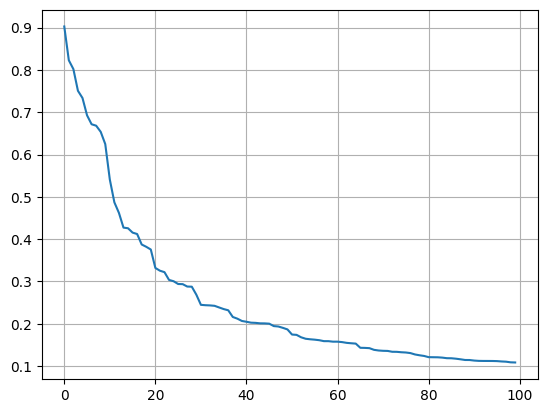

In [23]:
plt.plot(scores)
plt.grid(True)

In [24]:
labels = result.pred_instances.labels.cpu().numpy()
print(labels.shape)
print(labels)

(100,)
[13  2  2  2  2  2  2  2  2  2  2  2  2  2 17  2  2  2 16  2  2  2  2  2
  2  2  2  7  2  2  2  2  2 56  7  2  2  7  2  2  2  2 13  2  2  2  2  2
 56 20  2  2  7  2  2  2 19  7  7  7  7 18  2  7  2  2  1  0  2  7  2  2
  2  7  2  7  2  7  7  7  2  7  2  7  2  2  2  2  2  0  5  7  2  2  7  2
  2  2  7  7]


In [25]:
bboxes = result.pred_instances.bboxes.cpu().numpy()
print(bboxes.shape)
print(bboxes)

(100, 4)
[[222.11569  176.44319  456.50504  379.5542  ]
 [191.3614   110.16852  298.2379   155.14156 ]
 [296.68686  116.74252  378.84674  150.05376 ]
 [480.89517  110.386986 522.608    130.06699 ]
 [430.7356   105.35051  483.72485  132.09563 ]
 [397.9256   110.43737  434.10977  133.01797 ]
 [167.77252  108.19416  213.5399   140.92139 ]
 [589.91754  109.81096  619.0962   126.695404]
 [609.338    107.82222  635.3802   137.91394 ]
 [268.7664   104.63277  326.15604  125.48869 ]
 [  0.       111.19344   62.722145 146.30911 ]
 [570.9852   109.25723  594.38556  126.63824 ]
 [133.14937   90.05019  162.90782  104.61976 ]
 [ 79.35126   88.27677  118.68248  103.00601 ]
 [373.53964  133.52     433.0813   188.59079 ]
 [ 61.466976  92.59284   85.11898  105.14235 ]
 [552.8554   108.95563  592.7438   126.1205  ]
 [169.43744   95.16841  182.51622  106.002594]
 [372.68338  133.65805  433.1106   188.58417 ]
 [370.16177  109.88437  434.35632  133.56909 ]
 [  0.       112.68607   19.92877  144.17288 ]
 [13

In [26]:
masks = result.pred_instances.masks.cpu().numpy()
print(masks.shape)
print(masks)

(100, 427, 640)
[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ...

# VISUALIZERS

In [27]:
model.cfg

Config (path: configs/rtmdet/rtmdet-ins_tiny_8xb32-300e_coco.py): {'default_scope': 'mmdet', 'default_hooks': {'timer': {'type': 'IterTimerHook'}, 'logger': {'type': 'LoggerHook', 'interval': 50}, 'param_scheduler': {'type': 'ParamSchedulerHook'}, 'checkpoint': {'type': 'CheckpointHook', 'interval': 10, 'max_keep_ckpts': 3, 'save_best': 'auto'}, 'sampler_seed': {'type': 'DistSamplerSeedHook'}, 'visualization': {'type': 'DetVisualizationHook'}}, 'env_cfg': {'cudnn_benchmark': False, 'mp_cfg': {'mp_start_method': 'fork', 'opencv_num_threads': 0}, 'dist_cfg': {'backend': 'nccl'}}, 'vis_backends': [{'type': 'LocalVisBackend'}, {'type': 'TensorboardVisBackend'}], 'visualizer': {'type': 'DetLocalVisualizer', 'vis_backends': [{'type': 'LocalVisBackend'}, {'type': 'TensorboardVisBackend'}], 'name': 'visualizer'}, 'log_processor': {'type': 'LogProcessor', 'window_size': 50, 'by_epoch': True}, 'log_level': 'INFO', 'load_from': None, 'resume': False, 'train_cfg': {'type': 'EpochBasedTrainLoop', '

In [28]:
model.cfg.visualizer

{'type': 'DetLocalVisualizer',
 'vis_backends': [{'type': 'LocalVisBackend'},
  {'type': 'TensorboardVisBackend'}],
 'name': 'visualizer'}

In [29]:
model.dataset_meta

{'classes': ('person',
  'bicycle',
  'car',
  'motorcycle',
  'airplane',
  'bus',
  'train',
  'truck',
  'boat',
  'traffic light',
  'fire hydrant',
  'stop sign',
  'parking meter',
  'bench',
  'bird',
  'cat',
  'dog',
  'horse',
  'sheep',
  'cow',
  'elephant',
  'bear',
  'zebra',
  'giraffe',
  'backpack',
  'umbrella',
  'handbag',
  'tie',
  'suitcase',
  'frisbee',
  'skis',
  'snowboard',
  'sports ball',
  'kite',
  'baseball bat',
  'baseball glove',
  'skateboard',
  'surfboard',
  'tennis racket',
  'bottle',
  'wine glass',
  'cup',
  'fork',
  'knife',
  'spoon',
  'bowl',
  'banana',
  'apple',
  'sandwich',
  'orange',
  'broccoli',
  'carrot',
  'hot dog',
  'pizza',
  'donut',
  'cake',
  'chair',
  'couch',
  'potted plant',
  'bed',
  'dining table',
  'toilet',
  'tv',
  'laptop',
  'mouse',
  'remote',
  'keyboard',
  'cell phone',
  'microwave',
  'oven',
  'toaster',
  'sink',
  'refrigerator',
  'book',
  'clock',
  'vase',
  'scissors',
  'teddy bear',


In [30]:
# init the visualizer(execute this block only once)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta
visualizer

d:\miniconda3\envs\mm\Lib\site-packages\mmengine\utils\manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


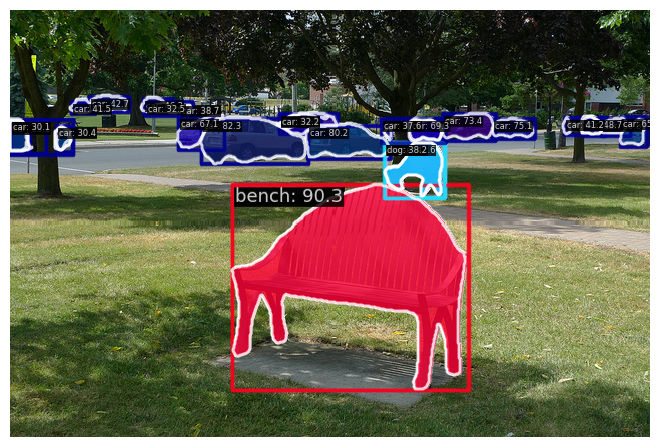

In [31]:
# show the results
visualizer.add_datasample(
    'result',
    np.array(image),
    data_sample=result,
    draw_gt=False,
    wait_time=0,
)
visualizer.show()